In [26]:
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
data=pd.read_excel(r'C:\Users\bhargav\Downloads\stock_market_prediction.xlsx')

In [28]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [29]:
data['Date'] = pd.to_datetime(data.Date)

In [30]:
data.shape

(4494, 7)

In [31]:
data.drop('Adj Close',axis =1,inplace=True)

In [32]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,21356352.0


In [33]:
data.isnull().sum()

Date      0
Open      8
High      8
Low       8
Close     8
Volume    8
dtype: int64

In [34]:
data.isna().any()

Date      False
Open       True
High       True
Low        True
Close      True
Volume     True
dtype: bool

In [35]:
data1 =pd.DataFrame(data)

In [36]:
data1.shape

(4494, 6)

In [37]:
dataset=data1.dropna()

In [38]:
dataset.shape

(4486, 6)

In [39]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4486 entries, 0 to 4493
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4486 non-null   datetime64[ns]
 1   Open    4486 non-null   float64       
 2   High    4486 non-null   float64       
 3   Low     4486 non-null   float64       
 4   Close   4486 non-null   float64       
 5   Volume  4486 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 245.3 KB


In [41]:
dataset.describe()

,Open,High,Low,Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,8.806715e+07


In [42]:
print(len(dataset))

4486


<AxesSubplot:>

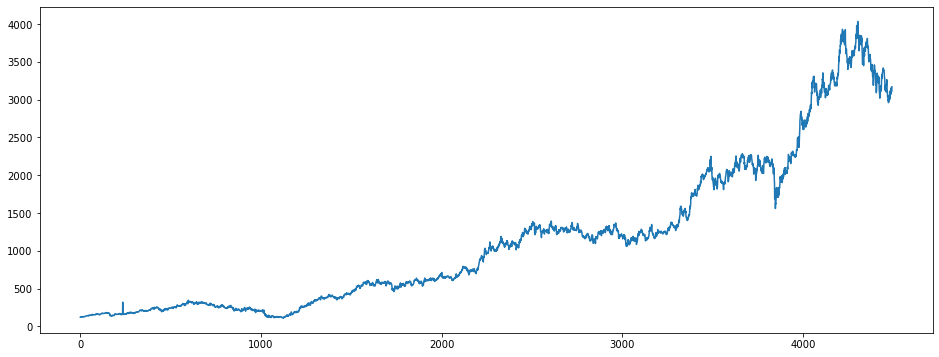

In [43]:
dataset['Open'].plot(figsize=(16,6))

In [44]:
x=dataset[['Open','High','Low','Volume']]
y=dataset['Close']

In [45]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(x,y,random_state = 0)

In [46]:
x_train.shape

(3364, 4)

In [47]:
x_test.shape

(1122, 4)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()

In [49]:
regressor.fit(x_train,y_train)

LinearRegression()

In [50]:
print(regressor.coef_)

[-5.55400220e-01  8.16541313e-01  7.38155813e-01 -1.43785466e-07]


In [51]:
print(regressor.intercept_)

0.4050235457477811


In [52]:
predicted=regressor.predict(x_test)

In [53]:
print(x_test)

             Open         High          Low     Volume
2969  1272.474976  1302.474976  1270.099976  1503374.0
2071   633.474976   633.950012   630.000000   509580.0
585    298.750000   301.500000   295.262512  2394400.0
3153  1267.400024  1285.000000  1264.824951  2534548.0
292    176.887497   179.375000   173.882507  6352952.0
...           ...          ...          ...        ...
2854  1168.000000  1195.500000  1150.500000  2648284.0
2885  1201.150024  1228.525024  1201.150024  2267654.0
1450   374.399994   374.450012   368.549988  2165596.0
3614  2078.149902  2079.699951  2007.400024  4397518.0
954    212.500000   216.925003   205.850006  9287176.0

[1122 rows x 4 columns]


In [54]:
predicted.shape

(1122,)

In [56]:
dframe=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [57]:
print(dframe)

      Actual Price  Predicted Price
2969   1300.525024      1294.512286
2071    632.075012       631.184150
585     299.000000       298.271873
3153   1279.574951      1279.019818
292     177.044998       176.067688
...            ...              ...
2854   1186.574951      1176.740185
2885   1225.625000      1222.737289
1450    369.500000       369.953024
3614   2014.500000      2025.502738
954     211.100006       210.124721

[1122 rows x 2 columns]


In [58]:
dframe.head(25)

,Actual Price,Predicted Price
2969,1300.525024,1294.512286
2071,632.075012,631.184150
585,299.000000,298.271873
3153,1279.574951,1279.019818
292,177.044998,176.067688
3044,1103.800049,1101.499296
1010,202.637497,204.169378
4447,3401.100098,3399.380893
1116,117.224998,116.586472
4483,3118.550049,3099.692698


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
regressor.score(x_test,y_test)

0.9999256251975522

In [61]:
import math

In [62]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 4.884157320193187


In [63]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 71.04520201777352


In [64]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 8.428831592680774


In [65]:
graph=dframe.head(20)

<AxesSubplot:>

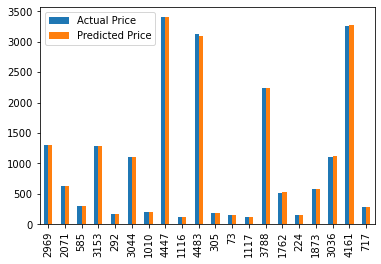

In [66]:
graph.plot(kind='bar')